In [2]:
import pandas as pd
import soundfile as sf
from scipy.signal import spectrogram
import numpy as np
from scipy.stats import zscore
from scipy.linalg import svd, toeplitz
from statsmodels.tsa.stattools import acf

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Loading dataframes

lag = 512

base = pd.read_pickle('./pkl_datasets/mamiraua_dataset_ACF_' + str(lag) + '.gzip')
cotas = pd.read_csv('./boundary_files/Cotas_HxC_bins_' + str(int(lag)) + '.csv')
noise = pd.read_csv('./coloredNoises/coloredNoises_' + str(int(lag)) + '.csv')

In [4]:
nfft = 1024
path = './mamiraua_samples/segment_'

s1 = '1481150534' # low entropy-low complexity
s2 = '1481169633' # medium entropy-high complexity
s3 = '1481150827' # high entropy-low complexity

# Power spectral density
x1, fs1 = sf.read(path + s1 + '.flac')
x1 = zscore(x1)
f1, t1, Pxx_s1 = spectrogram(x1/np.max(np.abs(x1)), fs1, nfft = nfft, nperseg = nfft, noverlap = nfft/2, window = 'hann', scaling = 'density')

x2, fs2 = sf.read(path + s2 + '.flac')
x2 = zscore(x2)
f2, t2, Pxx_s2 = spectrogram(x2/np.max(np.abs(x2)), fs2, nfft = nfft, nperseg = nfft, noverlap = nfft/2, window = 'hann', scaling = 'density')

x3, fs3 = sf.read(path + s3 + '.flac')
x3 = zscore(x3)
f3, t3, Pxx_s3 = spectrogram(x3/np.max(np.abs(x3)), fs3, nfft = nfft, nperseg = nfft, noverlap = nfft/2, window = 'hann', scaling = 'density')

/home/juan/env/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


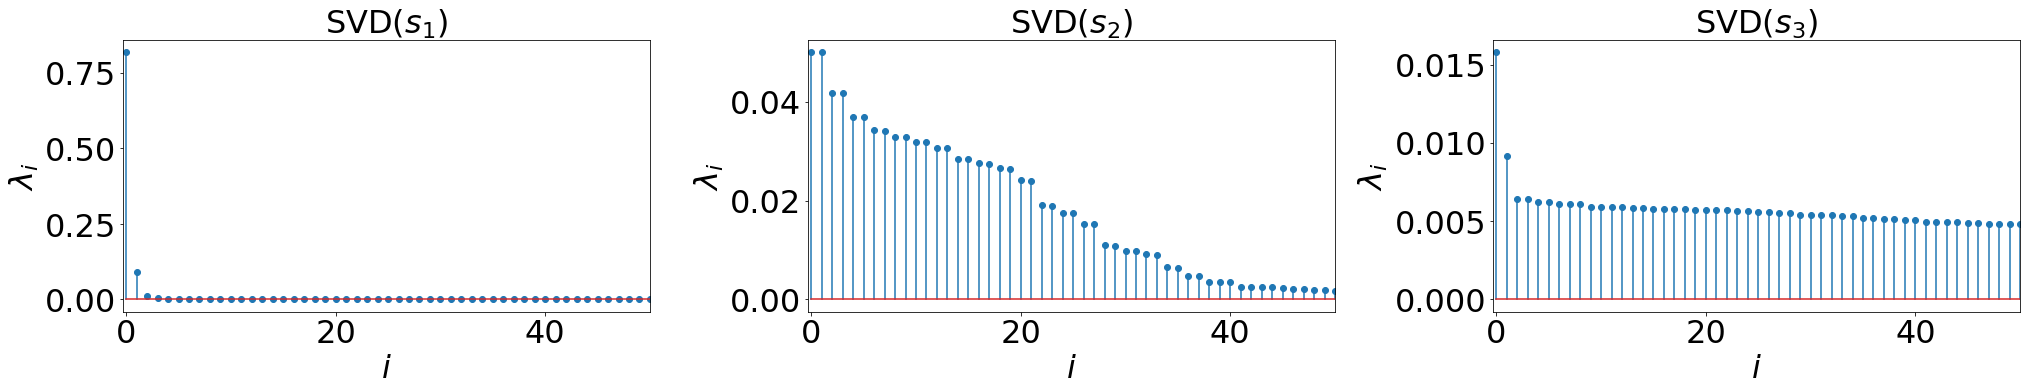

In [5]:
fig = plt.figure(figsize=(34,5))
plt.rc('font', size=32)
plt.rc('axes', titlesize=32)
plt.subplots_adjust(wspace = 0.3)
X = [x1, x2, x3]
singular_spectrums = []

for i, x in enumerate(X):
    rxx = acf(x, nlags=lag, unbiased=True, fft=True)
    Sxx = toeplitz(rxx)
    U, s, Vt = svd(Sxx)
    s = s/np.sum(s)
    singular_spectrums.append(s)
    
    plt.subplot(1,3,i+1)
    
    plt.stem(s[:60])
    plt.xlim([-0.3, 50])
    plt.xlabel('$i$')
    plt.ylabel('$\lambda_i$')
    plt.title('SVD(' + '$s_'+str(i+1)+'$'+')')

/home/juan/env/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/juan/env/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/juan/env/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove t

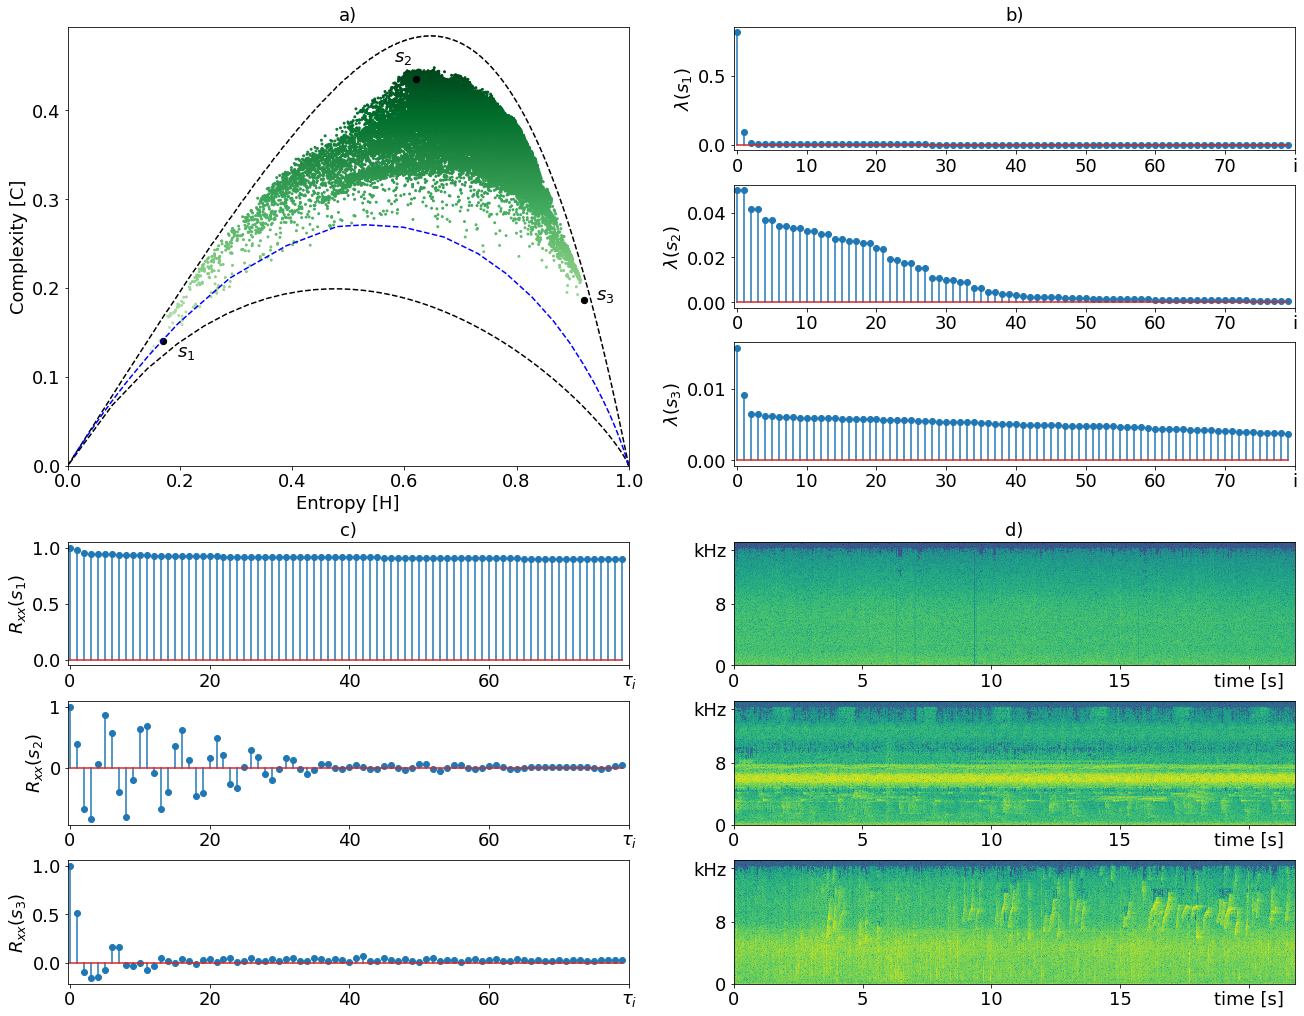

In [17]:
fig = plt.figure(figsize=(18,14),constrained_layout=True)
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
gs = fig.add_gridspec(6, 2, wspace=0.5)

ax1 = fig.add_subplot(gs[0:3,0])
ax1.plot(cotas['Entropy'],cotas['Complexity'], '--k', label = 'HxC boundaries')
ax1.plot(noise['Entropy'],noise['Complexity'], '--b', label = 'Colored noises')
plt.xlim([0, 1])
plt.ylim([0, np.max(cotas['Complexity'])+0.01])
plt.ylabel('Complexity [C]')
plt.xlabel('Entropy [H]')

ax1.scatter(base['H'], base['C'], marker='.', s=15, c=base['C'], 
            norm=plt.Normalize(vmax=np.max(base['C']), vmin=np.min(base['C'])-0.1),
            cmap = 'Greens') # seismic # viridis # plasma # jet # PuBu # YlOrRd # Blues

ax1.scatter(base[base['segment'] == s1].H.values[0], base[base['segment'] == s1].C.values[0], marker='o', s=40, c='k')
plt.text(base[base['segment'] == s1].H.values[0]+0.025, base[base['segment'] == s1].C.values[0]-0.018, '$s_1$')

ax1.scatter(base[base['segment'] == s2].H.values[0], base[base['segment'] == s2].C.values[0], marker='o', s=40, c='k')
plt.text(base[base['segment'] == s2].H.values[0]-0.04, base[base['segment'] == s2].C.values[0]+0.02, '$s_2$')

ax1.scatter(base[base['segment'] == s3].H.values[0], base[base['segment'] == s3].C.values[0], marker='o', s=40, c='k')
plt.text(base[base['segment'] == s3].H.values[0]+0.02, base[base['segment'] == s3].C.values[0]-0.0, '$s_3$')
plt.title('a)')

ax2 = fig.add_subplot(gs[0, 1])
ax2.stem(singular_spectrums[0][:80])
plt.title('b)')
plt.xlim([-0.5, 80])
plt.ylabel('$\lambda(s_1)$')
plt.xticks([0,10,20,30,40,50,60,70,80],['0','10','20','30','40','50','60','70','i'])

ax3 = fig.add_subplot(gs[1, 1])
ax3.stem(singular_spectrums[1][:80])
plt.xlim([-0.5, 80])
plt.ylabel('$\lambda(s_2)$')
plt.xticks([0,10,20,30,40,50,60,70,80],['0','10','20','30','40','50','60','70','i'])

ax4 = fig.add_subplot(gs[2, 1])
ax4.stem(singular_spectrums[2][:80])
plt.xlim([-0.5, 80])
plt.ylabel('$\lambda(s_3)$')
plt.xticks([0,10,20,30,40,50,60,70,80],['0','10','20','30','40','50','60','70','i'])

ax5 = fig.add_subplot(gs[3, 0])
ax5.stem(base[base['segment'] == s1].ACF_512.values[0][:80])
plt.xticks([0,20,40,60,80],['0','20','40','60',r'$\tau_i$'])
plt.ylabel(r'$R_{xx}(s_1)$')
plt.xlim([-0.3, 80])
plt.title('c)')

ax6 = fig.add_subplot(gs[4, 0])
ax6.stem(base[base['segment'] == s2].ACF_512.values[0][:80])
plt.xticks([0,20,40,60,80],['0','20','40','60',r'$\tau_i$'])
plt.ylabel(r'$R_{xx}(s_2)$')
plt.xlim([-0.3, 80])

ax7 = fig.add_subplot(gs[5, 0])
ax7.stem(base[base['segment'] == s3].ACF_512.values[0][:80])
plt.xticks([0,20,40,60,80],['0','20','40','60',r'$\tau_i$'])
plt.ylabel(r'$R_{xx}(s_3)$')
plt.xlim([-0.3, 80])

ax8 = fig.add_subplot(gs[3, 1])                     
ax8.pcolormesh(t1, f1, np.log(Pxx_s1))
plt.yticks([0,8000, 15000],['0','8', 'kHz'])
plt.xticks([0,5,10,15,20],['0','5','10','15','time [s]'])
plt.title('d)')

ax9 = fig.add_subplot(gs[4, 1])
ax9.pcolormesh(t2, f2, np.log(Pxx_s2))
plt.yticks([0,8000, 15000],['0','8', 'kHz'])
plt.xticks([0,5,10,15,20],['0','5','10','15','time [s]'])

ax10 = fig.add_subplot(gs[5, 1])
ax10.pcolormesh(t3, f3, np.log(Pxx_s3))
plt.yticks([0,8000, 15000],['0','8', 'kHz'])
plt.xticks([0,5,10,15,20],['0','5','10','15','time [s]'])

# fig.savefig('./figures/Fig3.png', format="png", bbox_inches='tight')
plt.show()